In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:

import numpy as np

In [ ]:
## Dummy comment

In [ ]:
import pandas as pd

## <strong>Multiple Models Combine With AAC </strong>

Count of label 0: 169247
Count of label 1: 13688
X_train_aac shape: (146348, 20)
y_train shape: (146348,)
X_test_aac shape: (36587, 20)
y_test shape: (36587,)

Decision Tree Model Report:
Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
Accuracy: 0.9242900483778391

Logistic Regression Model Report:
Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy: 0.9266952742777489

Random Forest Model Report:
Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_f

<ipython-input-10-2e6b67fc0665>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index, y=report_df['Accuracy'], palette='viridis')


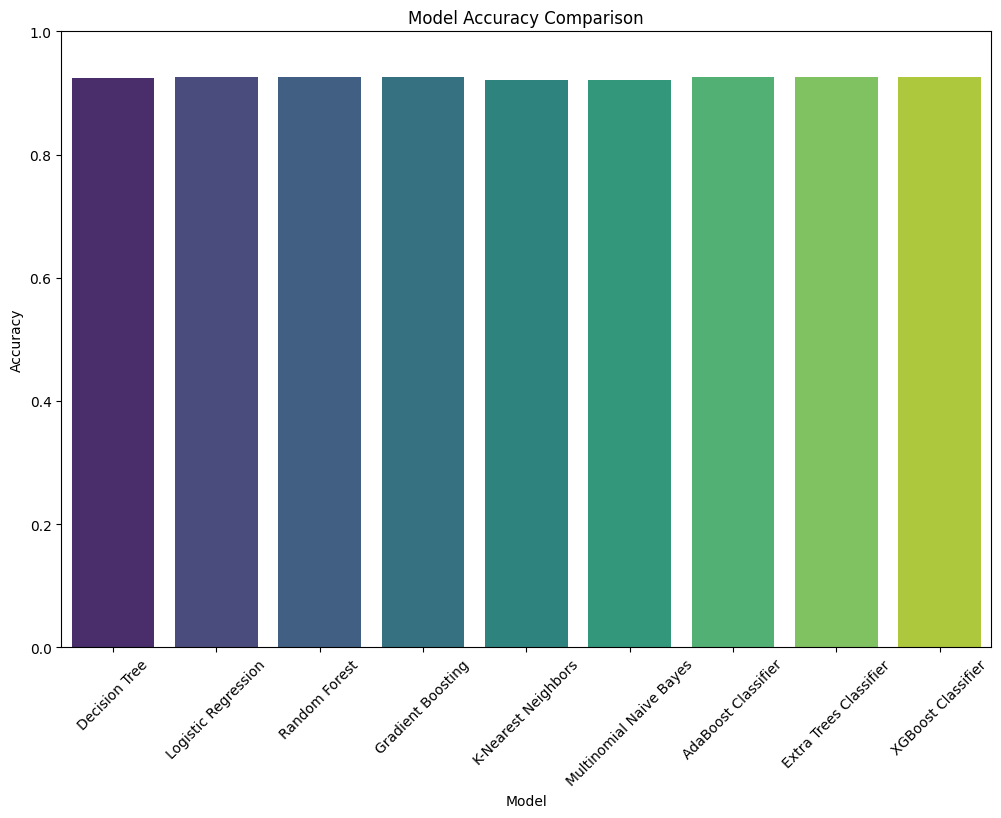


Model Report Table:
                         Accuracy
Decision Tree            0.924290
Logistic Regression      0.926695
Random Forest            0.926668
Gradient Boosting        0.926504
K-Nearest Neighbors      0.921748
Multinomial Naive Bayes  0.921475
AdaBoost Classifier      0.926695
Extra Trees Classifier   0.926695
XGBoost Classifier       0.926695


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from collections import Counter

# Fixed list of 20 standard amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Function to compute AAC features
def aac_compute(seq):
    seq = seq.replace('^', '')  # Remove '^' character if present
    aa_counts = Counter(seq)
    total_aa = len(seq)
    aa_percentages = [(aa_counts[aa] / total_aa) * 100 if total_aa > 0 else 0 for aa in amino_acids]
    return [round(v, 2) for v in aa_percentages]  # Round to two decimal places

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Load your dataset
data1 = pd.read_csv('/content/55_window_train.csv')

# Extract sequences and labels
X = data1['Seq']
y = data1['Label']

# Count the occurrences of each label
label_counts = y.value_counts()
print(f"Count of label 0: {label_counts.get(0, 0)}")
print(f"Count of label 1: {label_counts.get(1, 0)}")

# Drop rows where y is NaN
X = X[~y.isna()]
y = y.dropna()

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute AAC features for each sequence in X_train and X_test
X_train_aac = np.array(X_train.apply(aac_compute).tolist())
X_test_aac = np.array(X_test.apply(aac_compute).tolist())

print("X_train_aac shape:", X_train_aac.shape)
print("y_train shape:", y_train.shape)
print("X_test_aac shape:", X_test_aac.shape)
print("y_test shape:", y_test.shape)

# Define the models and their parameters
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Logistic Regression': LogisticRegression(penalty='l2', C=1.0, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    # 'Support Vector Classifier': SVC(kernel='rbf', C=1.0, gamma=0.01, random_state=42),
    'Multinomial Naive Bayes': MultinomialNB(),
    'AdaBoost Classifier': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Extra Trees Classifier': ExtraTreesClassifier(n_estimators=100, max_depth=10, random_state=42),
    'XGBoost Classifier': xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# Dictionary to store model reports
model_reports = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_aac, y_train)
    accuracy = evaluate_model(model, X_test_aac, y_test)
    model_reports[model_name] = {
        'Parameters': model.get_params(),
        'Accuracy': accuracy
    }

# Print the model reports
for model_name, report in model_reports.items():
    print(f"\n{model_name} Model Report:")
    print(f"Parameters: {report['Parameters']}")
    print(f"Accuracy: {report['Accuracy']}")

# Create a DataFrame for the model reports
report_df = pd.DataFrame.from_dict(model_reports, orient='index')

# Plot the accuracies
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=report_df.index, y=report_df['Accuracy'], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Generate a table to show model reports
report_table = report_df.drop(columns='Parameters')
print("\nModel Report Table:")
print(report_table.to_string())

# Save the table to a CSV file
report_table.to_csv('model_report_table.csv', index=True)


## <strong> Multiple Models With AAC + DPC Combine </strong>

In [ ]:
pip install catboost

X_train_combined shape: (146348, 420)
y_train shape: (146348,)
X_test_combined shape: (36587, 420)
y_test shape: (36587,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11006, number of negative: 135342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.716638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19847
[LightGBM] [Info] Number of data points in the train set: 146348, number of used features: 420
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.075204 -> initscore=-2.509364
[LightGBM] [Info] Start training from score -2.509364
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

<ipython-input-12-ca9e3c41fac3>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index, y=report_df['Accuracy'], palette='viridis')


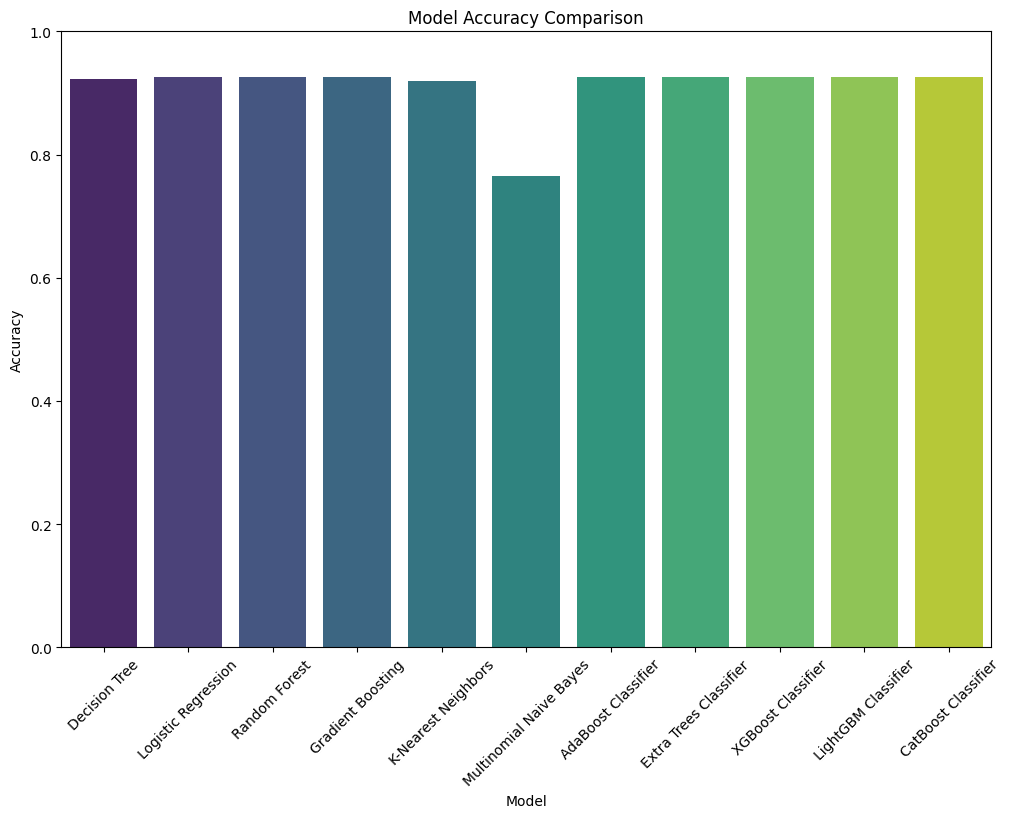


Model Report Table:
                         Accuracy
Decision Tree            0.923634
Logistic Regression      0.926695
Random Forest            0.926695
Gradient Boosting        0.926422
K-Nearest Neighbors      0.919562
Multinomial Naive Bayes  0.765791
AdaBoost Classifier      0.926695
Extra Trees Classifier   0.926695
XGBoost Classifier       0.926695
LightGBM Classifier      0.926695
CatBoost Classifier      0.926695


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from collections import Counter

# Fixed list of 20 standard amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Function to compute AAC features
def aac_compute(seq):
    seq = seq.replace('^', '')  # Remove '^' character if present
    aa_counts = Counter(seq)
    total_aa = len(seq)
    aa_percentages = [(aa_counts[aa] / total_aa) * 100 if total_aa > 0 else 0 for aa in amino_acids]
    return [round(v, 2) for v in aa_percentages]  # Round to two decimal places

# Function to compute DPC features
def dpc_compute(seq):
    seq = seq.replace('^', '')  # Remove '^' character if present
    dipeptides = [a1 + a2 for a1 in amino_acids for a2 in amino_acids]
    dipeptide_counts = Counter(seq[i:i+2] for i in range(len(seq) - 1))
    total_dipeptides = len(seq) - 1
    dipeptide_percentages = [(dipeptide_counts[dp] / total_dipeptides) * 100 if total_dipeptides > 0 else 0 for dp in dipeptides]
    return [round(v, 2) for v in dipeptide_percentages]  # Round to two decimal places

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Load your dataset
# data1 = pd.read_csv('path_to_your_dataset.csv')

# # Extract sequences and labels
# X = data1['Seq']
# y = data1['Label']

# # Drop rows where y is NaN
# X = X[~y.isna()]
# y = y.dropna()

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute AAC and DPC features for each sequence in X_train and X_test
X_train_aac = np.array(X_train.apply(aac_compute).tolist())
X_test_aac = np.array(X_test.apply(aac_compute).tolist())
X_train_dpc = np.array(X_train.apply(dpc_compute).tolist())
X_test_dpc = np.array(X_test.apply(dpc_compute).tolist())

# Concatenate AAC and DPC features
X_train_combined = np.concatenate([X_train_aac, X_train_dpc], axis=1)
X_test_combined = np.concatenate([X_test_aac, X_test_dpc], axis=1)

print("X_train_combined shape:", X_train_combined.shape)
print("y_train shape:", y_train.shape)
print("X_test_combined shape:", X_test_combined.shape)
print("y_test shape:", y_test.shape)

# Define the models and their parameters
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Logistic Regression': LogisticRegression(penalty='l2', C=1.0, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Multinomial Naive Bayes': MultinomialNB(),
    'AdaBoost Classifier': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Extra Trees Classifier': ExtraTreesClassifier(n_estimators=100, max_depth=10, random_state=42),
    'XGBoost Classifier': xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    'LightGBM Classifier': lgb.LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    'CatBoost Classifier': CatBoostClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, verbose=0)
}

# Dictionary to store model reports
model_reports = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_combined, y_train)
    accuracy = evaluate_model(model, X_test_combined, y_test)
    model_reports[model_name] = {
        'Parameters': model.get_params(),
        'Accuracy': accuracy
    }

# Print the model reports
for model_name, report in model_reports.items():
    print(f"\n{model_name} Model Report:")
    print(f"Parameters: {report['Parameters']}")
    print(f"Accuracy: {report['Accuracy']}")

# Create a DataFrame for the model reports
report_df = pd.DataFrame.from_dict(model_reports, orient='index')

# Plot the accuracies
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=report_df.index, y=report_df['Accuracy'], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Generate a table to show model reports
report_table = report_df.drop(columns='Parameters')
print("\nModel Report Table:")
print(report_table.to_string())

# Save the table to a CSV file
report_table.to_csv('model_report_table.csv', index=True)
